## Our Question:

#### What "kinds" of players are most likely to contribute a large amount of data?

## Players Data

9 columns x 196 different observations (rows)

Columns:
* experience (chr): How experienced is the player? (Veteran, Pro, Regular, Amateur, Beginner)
* subscribe (lgl): Unimportant to our question/uknown meaning --> Is the player subscribed or not?
* hashedEmail(chr): What is the players email?
* played_hours (dbl): How many total hours has the player logged?
* name (chr): What is the name of the player?
* gender (chr): What gender does the player identify as? (Male, Female, Non-binary, Agender, Two-Spirited, Prefer not to say)
* age (dbl): What is the age of the player?
* individualId / organizationName (lgl): N/A --> columns contain no input values

*Observations:*
* Data is collected when you first sign up for an account with PLAI; players enter their demographic, and their hours of total play time are tracked when they log in with those credientials.
* Issues with the players data include two columns (individualId and organizationName) which contain only N/A data. The hashedEmail column won't be necessary in our research question, nor will the subscribe column, as it has an unidentified input value. It's also important to note that many players recorded do not have *any* hours logged, so they will not be important to note when analyzing our research question.
* It's important to note that becuase the data was obtained from the players themselves, we are assuming no one lied when stating their age or gender.


## Sessions Data 
*Will not be neccesary for our analysis question.*

5 columns x 1535 observations (rows)

Columns:
* hashedEmail (chr): the email of the player
* start_time (chr): the start time of a specific player on a specific day
* end_time (chr): the end time of the specific player on a specific day
* original_start_time (dbl): undetermined; unreadable data
* original_end_time (dbl): undetermined; unreadable data

*Observations:*
* This data set contains mostly data that is difficult to create plots of. The end/start times contain both an hour and a date, which cannot be used functionally together. The email column is long and the only connection to the players data set. Both original start/end times are completely unreadable and most likely unimportant.
* The time starts and ends are both of the *chr* class, which makes them difficult to use.

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ─────────────────────────────────

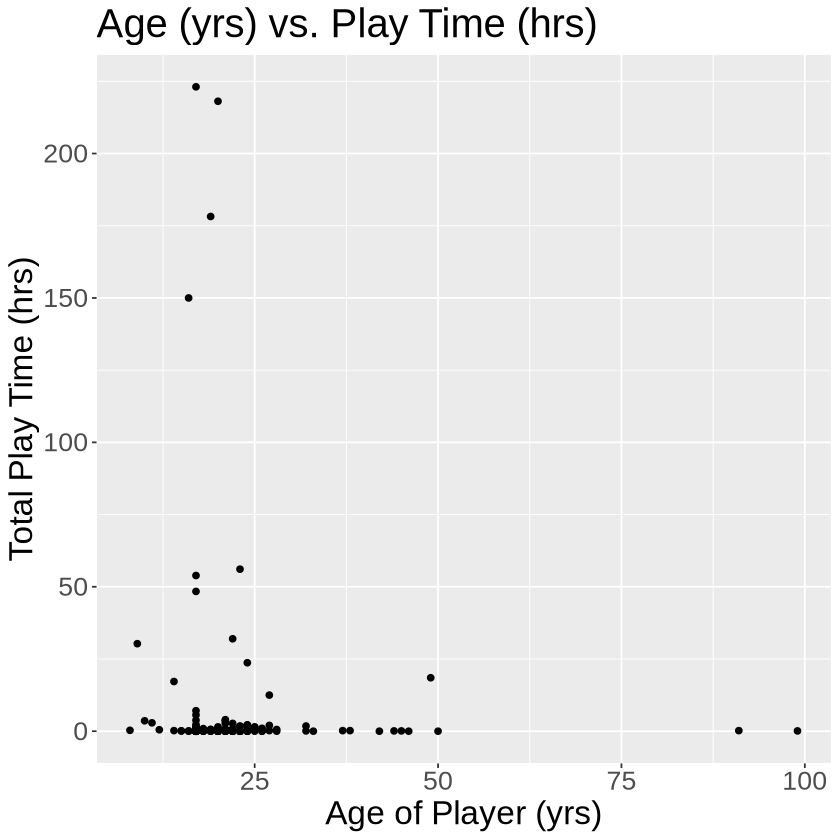

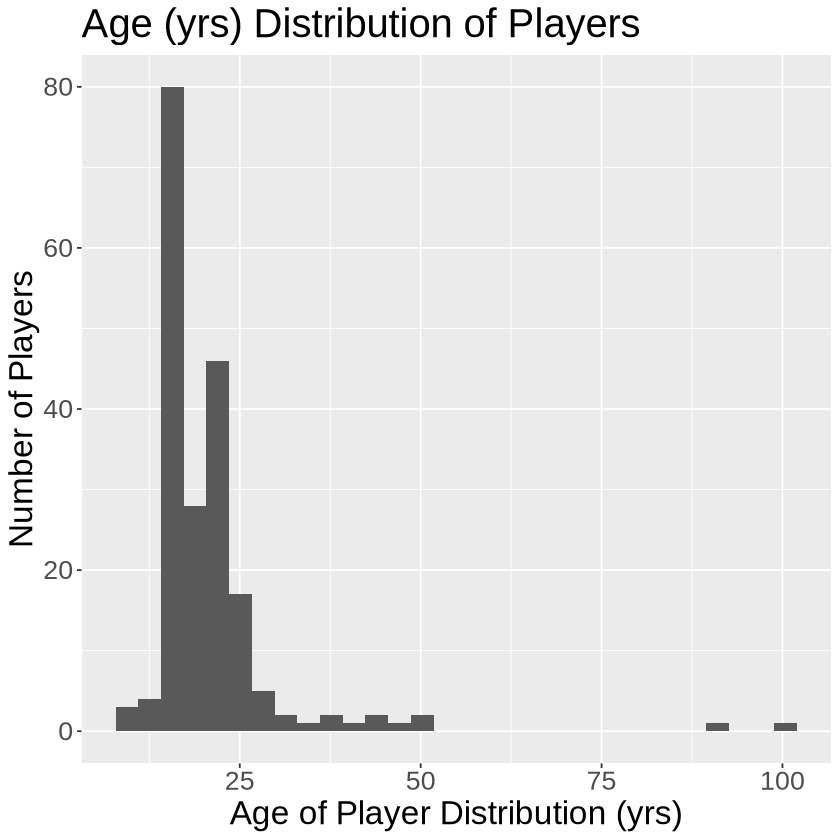

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


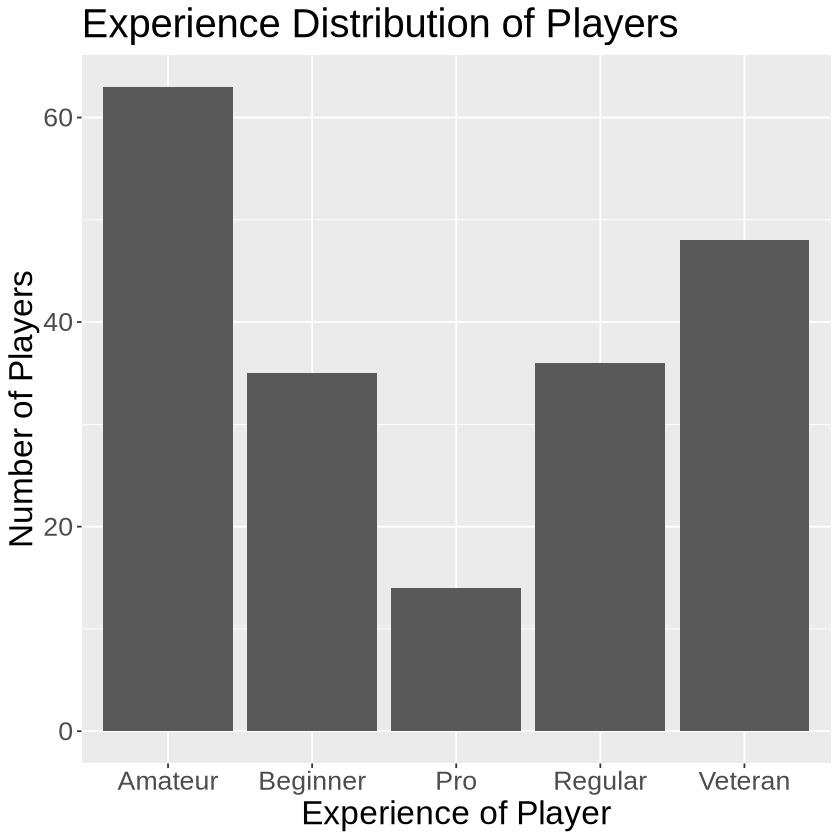

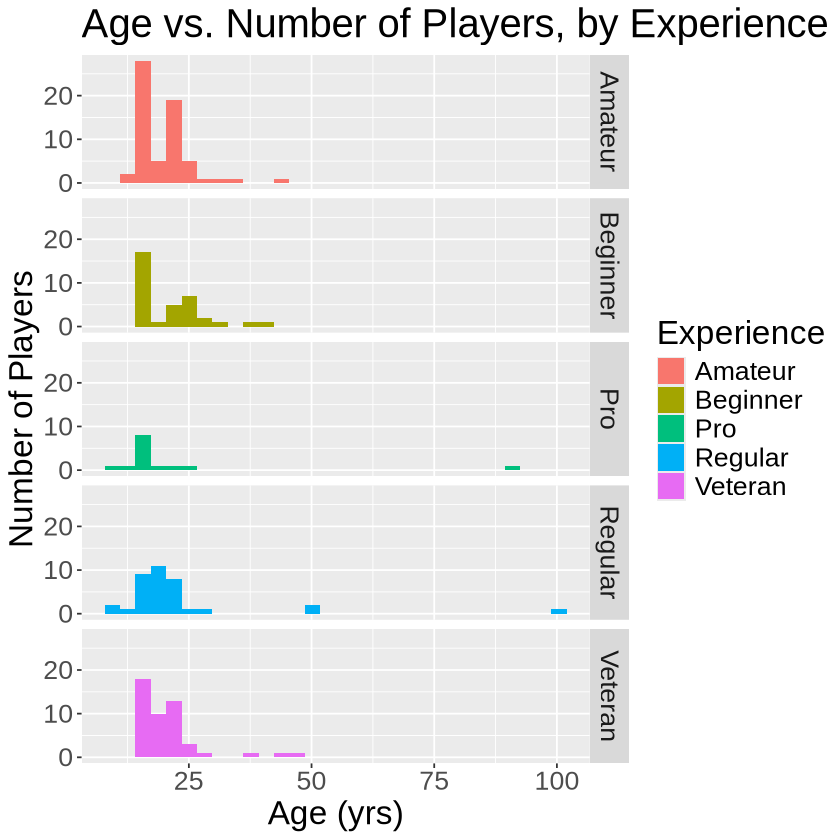

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


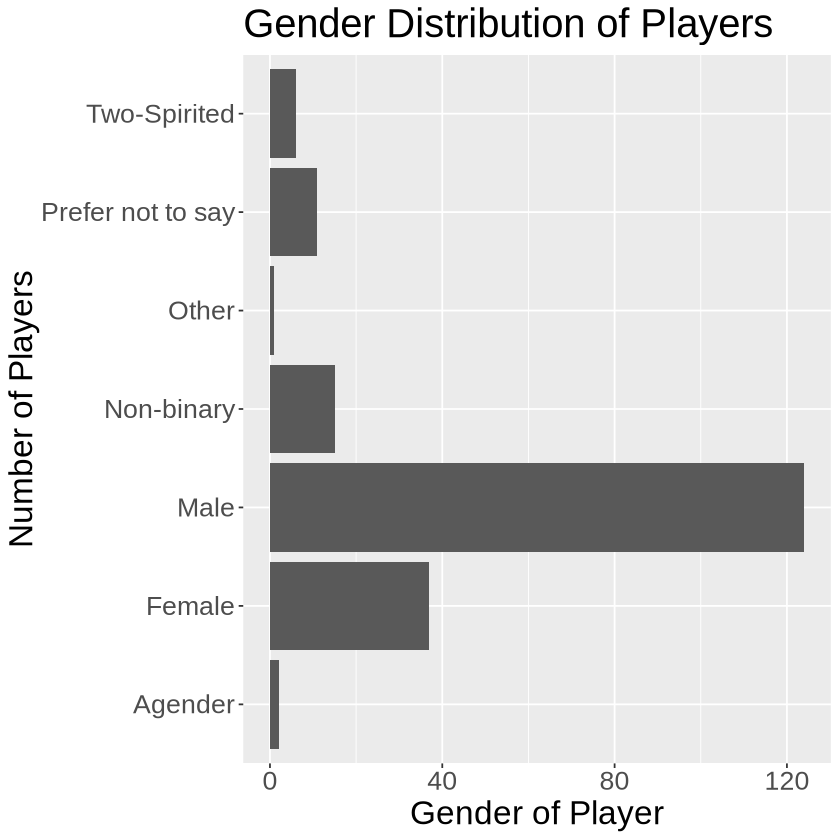

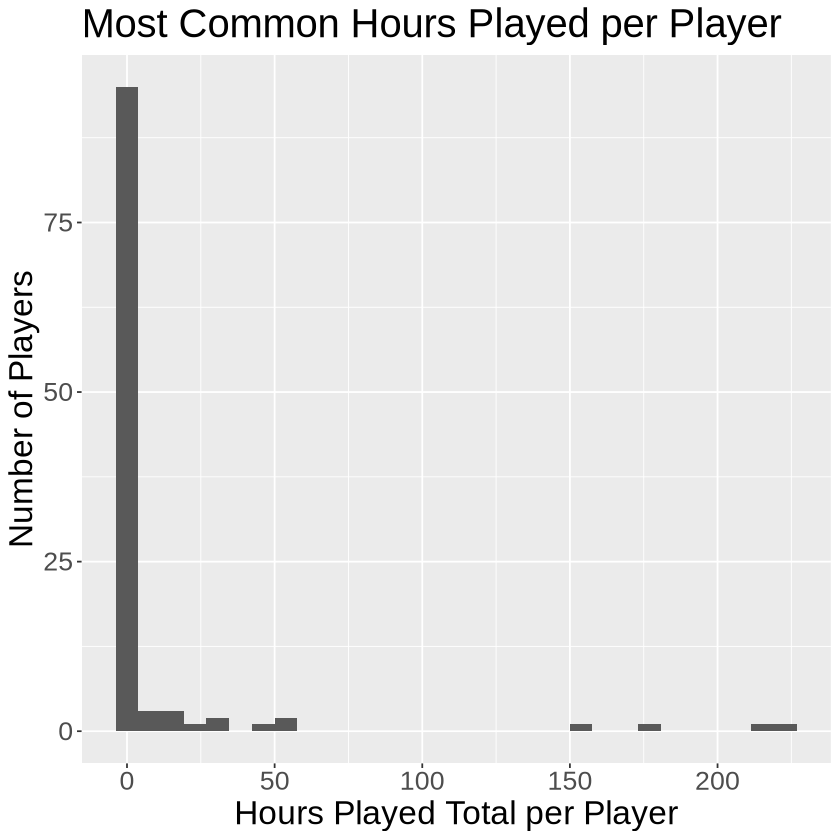

In [1]:
library(tidyverse)

#Reading in players data.
players <- read_csv("https://raw.githubusercontent.com/hpapiez/DSCI100-Project/refs/heads/main/players.csv")
#Reading in sessions data. We will not be using this data frame.
sessions <- read_csv("https://raw.githubusercontent.com/hpapiez/DSCI100-Project/refs/heads/main/sessions.csv")

#Wrangling players data.
players_ready <- select(players, experience, subscribe, played_hours, name, gender, age)

#Exploratory visualizations.
age_vs_hours <- ggplot(players_ready, aes(x = age, y = played_hours)) +
                    geom_point() +
                    labs(x = "Age of Player (yrs)", y = "Total Play Time (hrs)") +
                    ggtitle("Age (yrs) vs. Play Time (hrs)") +
                    theme(text = element_text(size = 20))
age_vs_hours

age_vs_count_hist <- ggplot(players_ready, aes(x = age)) +
                        geom_histogram() +
                        labs(x = "Age of Player Distribution (yrs)", y = "Number of Players", fill = "Age") +
                        ggtitle("Age (yrs) Distribution of Players") +
                        theme(text = element_text(size = 20))
age_vs_count_hist

experience_vs_count <- ggplot(players, aes(x = experience)) +
                            geom_bar(stat = "count") +
                            labs(x = "Experience of Player", y = "Number of Players") +
                            ggtitle("Experience Distribution of Players") +
                            theme(text = element_text(size = 20))
experience_vs_count

experience_vs_hours <- ggplot(players, aes(x = age, fill = experience)) +
                            geom_histogram() +
                            facet_grid(rows = vars(experience)) +
                            labs(x = "Age (yrs)", y = "Number of Players", fill = "Experience") +
                            ggtitle("Age vs. Number of Players, by Experience") +
                            theme(text = element_text(size = 20))
experience_vs_hours

gender_vs_count <- ggplot(players, aes(y = gender)) +
                        geom_bar(stat = "count") +
                        labs(x = "Gender of Player", y = "Number of Players") +
                        ggtitle("Gender Distribution of Players") +
                        theme(text = element_text(size = 20))
gender_vs_count

hours_vs_distribution <- players |>
                            filter(played_hours > 0) |>
                            ggplot(aes(x = played_hours)) +
                            geom_histogram() +
                            labs(x = "Hours Played Total per Player", y = "Number of Players") +
                            ggtitle("Most Common Hours Played per Player") +
                            theme(text = element_text(size = 20))
hours_vs_distribution

# Visualization Analysis

*Age vs. Play Time:*
* There appears to be an incredibly weak, somewhat discernable negative (possibly cubic) correlation between age and play time. However, many players with no data or very low play time create noise in the graph.

Age Distribution:
* Most players are between the ages of 15 and 20.

*Experiene Distribution:*
* Most players are amateurs.
* The least amount of players are pros.

*Age vs. Number of players, by Experience:*
* Most experience levels have the highest number of players with an age of about 18.
* Regular plays appear to have a slightly higher demographic. Beginners also have a higher number of relatively older players.

*Gender Distribution of Players:*
* Most players are men, with the second and third most popular being women and non-binary people respectively.
* The smallest represented demographic are agender people.

*Most Common Hours Played per Player:*
* The most common total hours played per player is between 0-10 hours. After that, distributions are relatively equal among different players.
* There seems to be a gap, between approximately 60-150 hours, where no player has anything near this total.

# Methods and Plan:

**Research Question:** *What "kinds" of players are most likely to contribute a large amount of data?*

I propose the best way to answer this question is with classification analysis (K-NN regression, not linear regression). Our question focuses mostly on the *type* of player. What this means is that it does not refer to a linear trend, but a classification. Is the player more experienced, of a specific age, or of a specific gender? If so, these are different ways to desribe the players based off of the `players` data set. These are all different ways to *classify* players. 

We must assume that the data collected is actually true, since it's input by the players themselves. In classifications, you must be certain you choose the right 'k' value if you use k-nn regression, as certain classification models are prone to over-fitting and under-fitting. It's also important to note that if you use k-nn regressions, they cannot be used to predict data points past your known values. After a certain point, the algorithm will use the same nearest neighbor values, and all predictions will be the same. Sometimes, variables aren't scaled and they have more influence on the final product than they should. 

I will attempt to follow the examples in the textbook and select the K-NN model by first cross-validating to choose the best K value, using the metrics() function to analyze which is the best for the `players` data set. First, I'll create a recipe, model, and workflow, then fit the workflow to my data and run it through the predict function. I'll split the data with initial_split, setting my proportion equal to .75 (standard) and my strata equal to the categorical label I want to predict, to ensure both training/testing data sets have an equal proportion. I'll cross validate with 5 folds (standard), and use metrics() to compare accuracy.